In [1]:
with open('./neko.txt', mode='r', encoding='utf-8') as f:
    wagahai = f.read()

wagahai_list = wagahai.split('\n')


# 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [2]:
from janome.tokenizer import Tokenizer
t = Tokenizer()

def add_token_to_dict(v, obj, token):
    if v in obj:
        obj[v] += [token]
    else:
        obj[v] = [token]

surface_dict = {}
surface_sentence_dict = {}
# base_dict = {}
# pos_dict = {}
# pos1_dict = {}
all_word_list = []
for sentence in wagahai_list:
    sentence = sentence.strip()
    for token in t.tokenize(sentence.strip()):
        pos = token.part_of_speech.split(',')
        # if pos[0] not in ['動詞', '名詞', '形容詞', '副詞']:
        if pos[0] not in ['名詞']:
            continue

        add_token_to_dict(token.surface, surface_dict, token)
        # add_token_to_dict(token.base_form, base_dict, token)
        # add_token_to_dict(pos[0], pos_dict, token)
        # add_token_to_dict(pos[1], pos1_dict, token)

        if token.surface in surface_sentence_dict:
            surface_sentence_dict[token.surface] += [sentence]
        else:
            surface_sentence_dict[token.surface] = [sentence]

        all_word_list += [token.surface]

# pos_dict.keys()


In [12]:
from janome.tokenizer import Tokenizer
from collections import Counter

def topN_co_occurrences_words(list, n):
    counter = Counter(list)
    return counter.most_common()[0:n]

t = Tokenizer()

top3_word_list = topN_co_occurrences_words(all_word_list, 3)
cooccurrece_word_list = []

print(top3_word_list)

for (word, cnt) in top3_word_list:
    sentences = surface_sentence_dict[word]
    related_word_list = []
    for sentence in sentences:
        for token in t.tokenize(sentence):
            # 自分と同じものは除外
            if token.surface == word:
                continue
            pos = token.part_of_speech.split(',')
            if pos[0] not in ['名詞']:
                continue
            related_word_list += [token.surface]

    print({
        'word': word,
        'cnt': cnt,
        'related_word_list': topN_co_occurrences_words(related_word_list, 3),
    })

# cooccurrece_word_list

[('の', 1611), ('事', 1207), ('もの', 980)]
{'word': 'の', 'cnt': 1611, 'related_word_list': [('事', 343), ('主人', 246), ('もの', 245)]}
{'word': '事', 'cnt': 1207, 'related_word_list': [('の', 343), ('もの', 196), ('君', 188)]}
{'word': 'もの', 'cnt': 980, 'related_word_list': [('の', 245), ('事', 196), ('よう', 163)]}


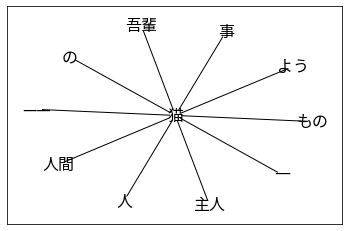

In [ ]:
# import matplotlib.pyplot as plt
# from matplotlib import font_manager
# import japanize_matplotlib
# import networkx as nx


# G = nx.Graph()
# G.add_node(u'猫')
# for v in most_common[0:10]:
#     w = v[0]
#     if not G.has_node(w):
#         G.add_node(w)

#     G.add_edge(u'猫', w)

# pos = nx.spring_layout(G)
# nx.draw_networkx_nodes(G, pos, node_size=100, node_color='w')
# nx.draw_networkx_edges(G, pos, width=1)
# nx.draw_networkx_labels(G, pos, font_size=16, font_family='Noto Sans JP')

# plt.show()